In [14]:
# Step 1: Install Required Libraries
!pip install tensorflow scikit-learn matplotlib joblib pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Step 2: Import Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

In [16]:
# Step 3: Generate Simulated AQI Data (365 Days)
np.random.seed(42)
aqi_values = np.cumsum(np.random.randn(365) * 2 + 0.2) + 100

In [17]:
# Convert to DataFrame and Save
df = pd.DataFrame({'AQI': aqi_values})
df.to_csv("aqi_sample_data.csv", index=False)

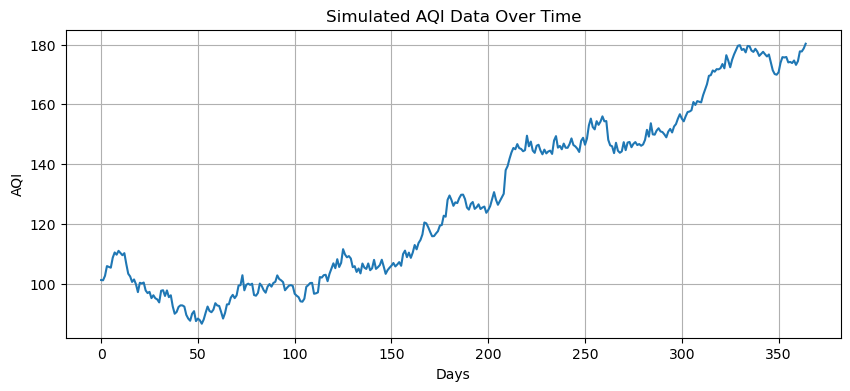

In [5]:
# Step 4: Visualize the AQI Data
plt.figure(figsize=(10, 4))
plt.plot(df['AQI'])
plt.title("Simulated AQI Data Over Time")
plt.xlabel("Days")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

In [18]:
# Step 5: Normalize Using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [19]:
# Step 6: Create Sequences for LSTM
SEQ_LENGTH = 14

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LENGTH)

In [20]:
# Step 7: Split Data into Training and Test Sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [24]:
# Step 8: Build and Train the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20)

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2065
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1518
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0868
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0309
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0116
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013   
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━

In [26]:
from tensorflow import keras

model = keras.models.load_model('greenguard_lstm_model.h5', compile=False)
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Step 9: Save the Trained Model
model.save('greenguard_lstm_model.h5')

In [27]:
from keras.saving import register_keras_serializable

@register_keras_serializable()
def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [22]:
# Step 10: Predict and Plot Results
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


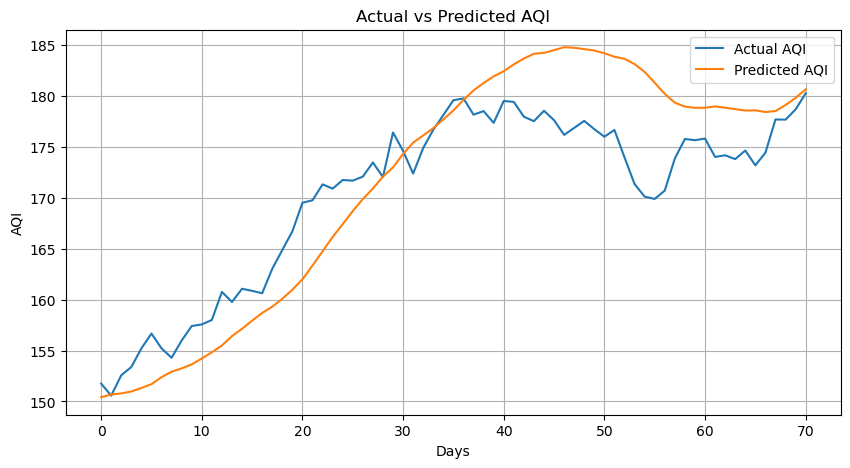

In [12]:
# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual AQI')
plt.plot(y_pred_inv, label='Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Step 11: Forecast the Next Day AQI
last_seq = scaled_data[-SEQ_LENGTH:]
input_seq = last_seq.reshape((1, SEQ_LENGTH, 1))
forecast = model.predict(input_seq)
forecast_aqi = scaler.inverse_transform(forecast)[0][0]

print("📅 Forecasted AQI for Tomorrow:", round(forecast_aqi, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
📅 Forecasted AQI for Tomorrow: 181.55
